# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Question 1:**

1. The paper is about the advantages of "tidy" datasets when it comes to data cleaning, and what structure/manipulation is necessary to achieve these datasets. Each row is an observation, each column is a variable, and each observational unit is a table.

2. It is intended to create a standard method of organization of data within a dataset to make it easier to read/work with, and encourage initial data exploration and simplify the use of multiple data analysis tools.

3. All tidy datasets are structure in the same way, and thus should be similar. The data that is initially given though, which is untidy, presents their own unique problems (different NA values, unclear codebooks, inconsistent formatting, etc.). Datasets will not have the exact same problems wrong with them, and thus (at our level, for now), the data needs human eyes on it to determine what the problems are and how to mitigate the issues. When given a data set, it is pretty clear that each row represents an observation while the columns keep track of the variables. However when assmebling data oneself or trying to generally define the terms, it becomes less clear if something is a variable or observation as they could be organized in more than one way. For example, height and width could both be integer variables with their own columns, or they could be values taken on by the variable dimension. The organization of the data in columns and rows dictates which is "correct".

4. Values are the collection of quantitative and qualitative data (numbers and strings) that make up a dataset. Variables are values grouped by similar attributes (columns: height, temperature) whereas observations are a group of data across variables for one particular "instance" of measurement (or a unit) (rows: person, day, region).

5. Tidy data, as opposed to messy data, is defined as data that has variables forming the columns and observations forming the rows. Each observational unit must form a table.

6. The 5 most common problems with messy datasets are: column headers are not names and instead values, multiple variables are stored in one column, variables are stored in both rows and columns, multiple observational units are in the same table, and a single observational unit are in multiple tables. Table 4 is messy because the column headers are values instead of variable names (income), and both the rows and the columns represent variables whereas teh values are the frequencies/observations. Melting a data set refers to stacking or expanding the data, where columns are turned into rows. 

7. The year, month, and day column were combined into one date column which got rid of a lot of empty values (since day is really a value). Furthermore, tmax and tmin were extracted as 2 columns instead of "element" deciding what "value" actually describes. 

8. The chicken-and-egg problem is referring to the link between tidy data and tools for tidy data. If the data changes structure, then the tools will no longer work, and if the tools change to improve efficiency/workflow, then it wouldn't work on the now "untidy" data. Changing one requires changing both or creating work arounds. Wickham hopes that data continues to become more organizable and clear, and that the tools keep improving as well. They hope that data scientists think about this problem and work constructively on it instead of just using the information in the paper presented mindlessly. 

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [73]:
#import statements
import numpy as np
import pandas as pd

#reading all the files to the notebook, so it is all run only once
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
dfbnb = pd.read_csv('./data/airbnb_hw.csv',low_memory = False)
dfshark = pd.read_csv('./data/sharks.csv',low_memory = False)
dftrial = pd.read_csv(url,low_memory = False)

**Question 2, Part 1:**

In [40]:
dfbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [41]:
dfbnb.shape

(30478, 13)

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '15

<Axes: >

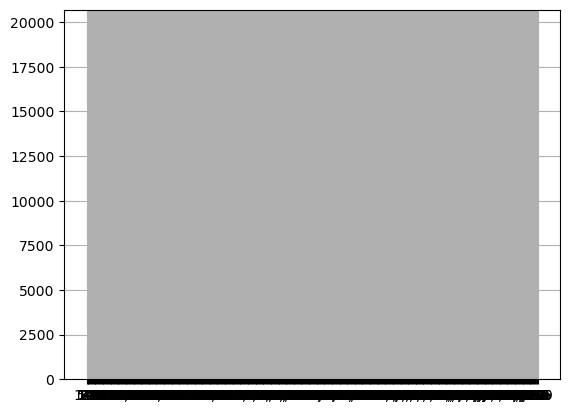

In [42]:
var = 'Price'
print(dfbnb[var].describe())
print(dfbnb[var].unique() , '\n')
dfbnb[var].hist()

In [43]:
#first get rid of commas in values >= 1000, using '.str.replace' since the values are stored as strings
dfbnb[var] = dfbnb[var].str.replace(',','')

#typecast from string to int
dfbnb[var] = pd.to_numeric(dfbnb[var], errors = 'coerce')

#prints relevant information to check what cleaning did, and how many null/nan values are in the data
print(dfbnb[var].describe())
print(dfbnb[var].unique() , '\n')
print('Total missing: ',sum(dfbnb[var].isnull()))

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64
[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114

**Question 2, Part 2:**

In [44]:
dfshark.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dfshark['Type'].value_counts()

Type
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: count, dtype: int64

In [46]:
#all types of watercraft (which is the name with the most entries) so consolidate
dfshark['Type'] = dfshark['Type'].replace(['Watercraft','Boat','Boating','Boatomg'], 'Watercraft')

#Combine all unknown incidents into one type
dfshark['Type'] = dfshark['Type'].replace(['Questionable','Unconfirmed','Unverified','Under investigation'], 'Unknown')

#not entirely sure what "Sea Disaster" means so not consolidating it
dfshark['Type'].value_counts()

Type
Unprovoked      4716
Provoked         593
Invalid          552
Watercraft       344
Sea Disaster     239
Unknown           13
Name: count, dtype: int64

**Question 2, Part 3:**

In [47]:
dftrial.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [48]:
dftrial = dftrial.rename(columns = {"WhetherDefendantWasReleasedPretrial":"ReleasedPretrial"})

In [51]:
dftrial['ReleasedPretrial'].value_counts()

ReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64

In [58]:
#in the codebook, 9 means unclear. So replace those with 'np.nan' and count them as missing/null
#currently ints so just using '.replace'
dftrial['ReleasedPretrial'] = dftrial['ReleasedPretrial'].replace(9,np.nan)
dftrial['ReleasedPretrial'].value_counts()

ReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64

In [60]:
print('Total missing: ',sum(dftrial['ReleasedPretrial'].isnull()))

Total missing:  31


**Question 2, Part 4:**

In [74]:
sentenceLength = dftrial['ImposedSentenceAllChargeInContactEvent']
sentenceLength.value_counts()

ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64

In [75]:
sentenceType = dftrial['SentenceTypeAllChargesAtConvictionInContactEvent']
sentenceType.value_counts()

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64

In [76]:
#turn blank values in sentenceLength into null/numeric values
sentenceLength = pd.to_numeric(sentenceLength, errors = 'coerce')
print(np.sum(sentenceLength.isnull()))

9053


In [79]:
#large amount of null values is bad, so cross-check the missing null values with sentenceTypes
pd.crosstab(sentenceLength.isnull(),sentenceType)

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
False,8720,4299,914,0,0
True,0,0,0,8779,274


In [81]:
#9 represents not applicable and should be null/nan, 4 represents 'other' which are mostly just 'no incarceration' anyways, so convert to "0"
sentenceLength = sentenceLength.mask(sentenceType == 9, np.nan)
sentenceLength = sentenceLength.mask(sentenceType == 4, 0)
pd.crosstab(sentenceLength.isnull(),sentenceType)

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
False,8720,4299,914,8779,0
True,0,0,0,0,274


In [82]:
sentenceLength.value_counts()

ImposedSentenceAllChargeInContactEvent
0.000000     13732
12.000000     1404
0.985626      1051
6.000000       809
3.000000       787
             ...  
49.971253        1
57.034908        1
79.926078        1
42.164271        1
1.657084         1
Name: count, Length: 483, dtype: int64

In [83]:
print('Total missing: ',sum(sentenceLength.isnull()))

Total missing:  274
